In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')
%matplotlib inline

In [210]:
df = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

In [211]:
df.head(4)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6


In [212]:
print(df.shape)

(195, 39)


In [213]:
df.set_index("Country", inplace=True)
df.head(4)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6


In [214]:
df.shape

(195, 38)

In [215]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [216]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

df_top5 = df.head(5)

df_top5 = df_top5[years].transpose()
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


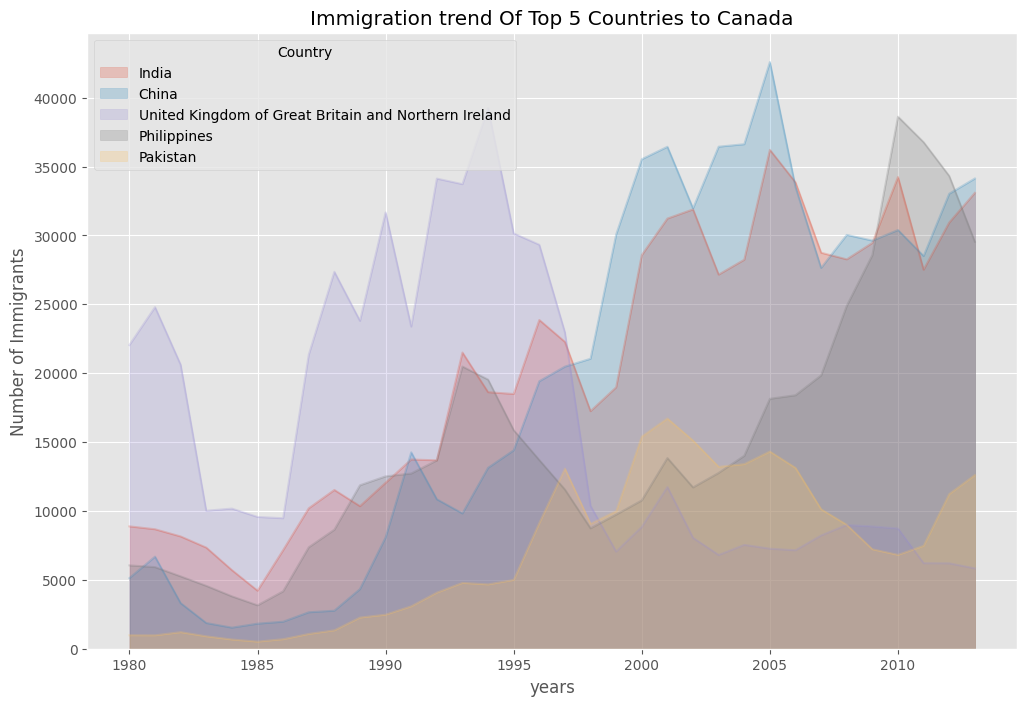

In [217]:
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind="area", alpha=0.25, stacked=False, figsize=(12, 8))
plt.title("Immigration trend Of Top 5 Countries to Canada")
plt.xlabel("years")
plt.ylabel("Number of Immigrants")
plt.show()

Text(0, 0.5, 'Immigrations')

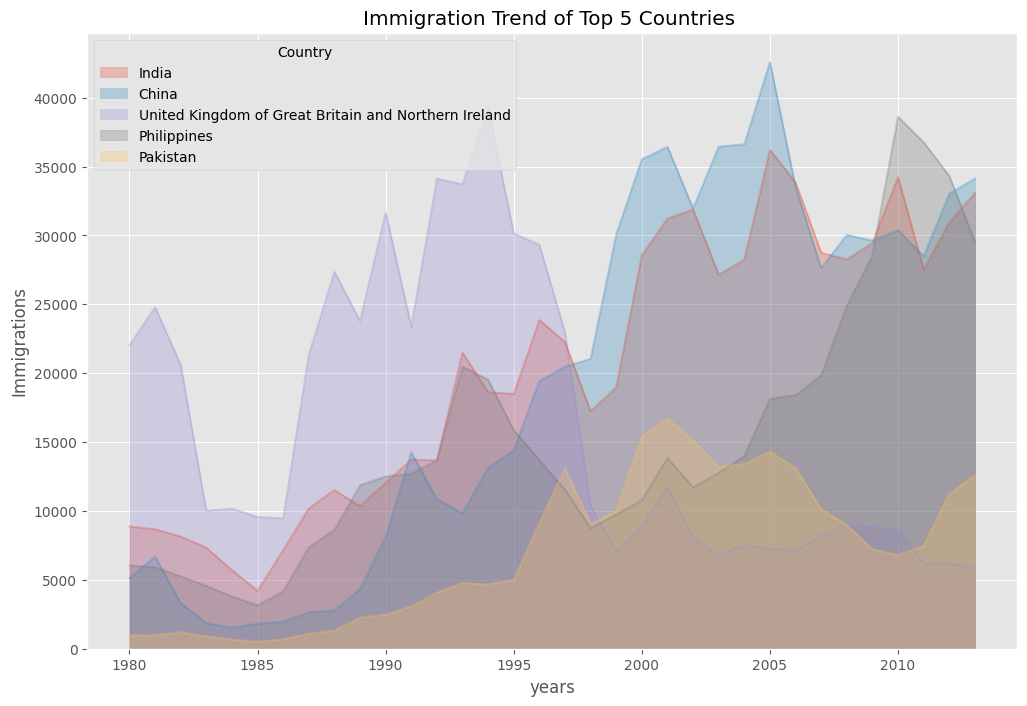

In [218]:
ax = df_top5.plot(kind='area', alpha=0.29, stacked=False, figsize=(12, 8))
ax.set_title("Immigration Trend of Top 5 Countries ")
ax.set_xlabel("years")
ax.set_ylabel("Immigrations")

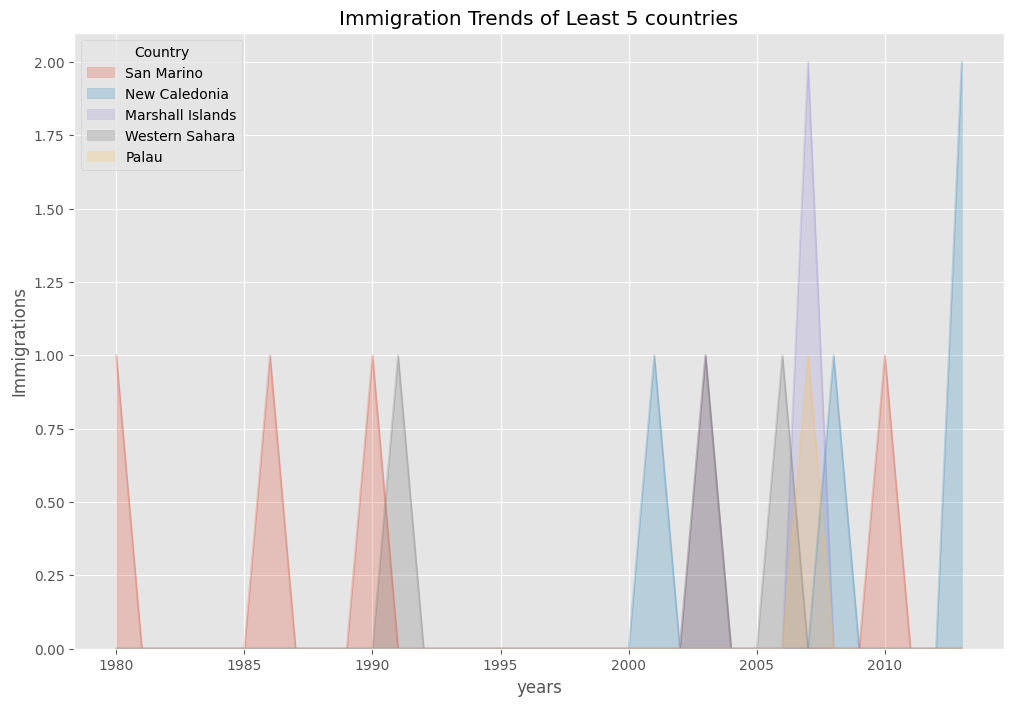

In [219]:
df_bottom5 = df.tail(5)

df_bottom5 = df_bottom5[years].transpose()
df_bottom5.head(5)

df_bottom5.index = df_bottom5.index.map(int)

df_bottom5.plot(kind='area', stacked=False, alpha=0.25, figsize=(12, 8))

plt.title("Immigration Trends of Least 5 countries")
plt.xlabel("years")
plt.ylabel("Immigrations")
plt.show()

Text(0, 0.5, 'Immigrations')

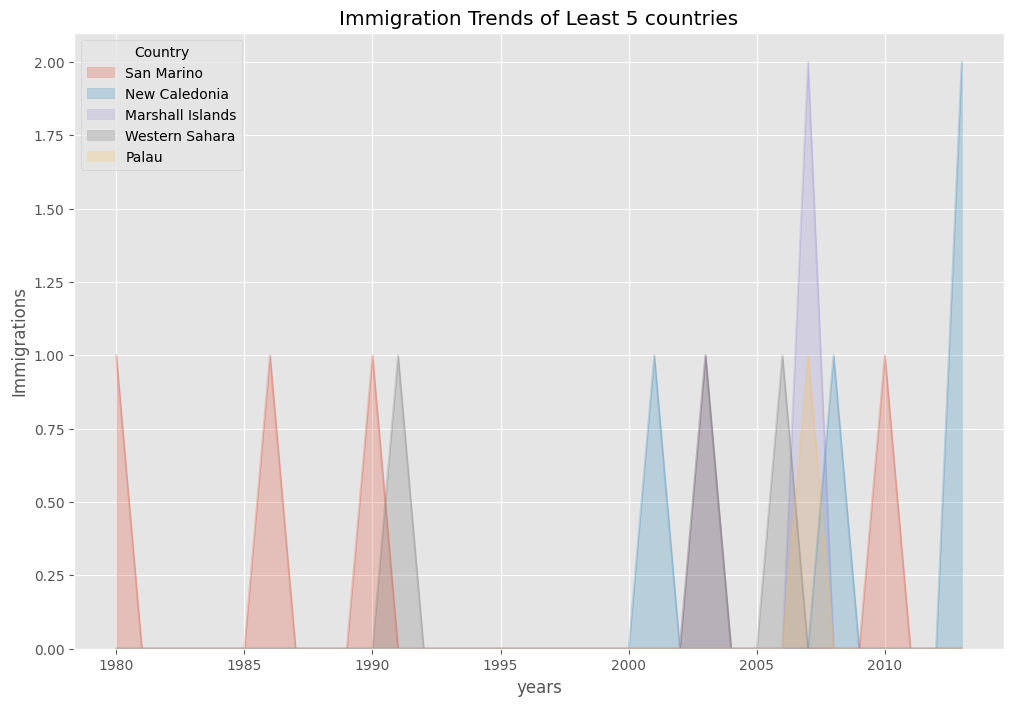

In [220]:
ax = df_bottom5.plot(kind='area', stacked=False, alpha=0.25, figsize=(12, 8))
ax.set_title("Immigration Trends of Least 5 countries")
ax.set_xlabel("years")
ax.set_ylabel("Immigrations")

## Histogram


In [221]:
df['2011'].head()

Country
India                                                   27509
China                                                   28502
United Kingdom of Great Britain and Northern Ireland     6204
Philippines                                             36765
Pakistan                                                 7468
Name: 2011, dtype: int64

In [222]:
count, bin_edges = np.histogram(df['2013'])
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


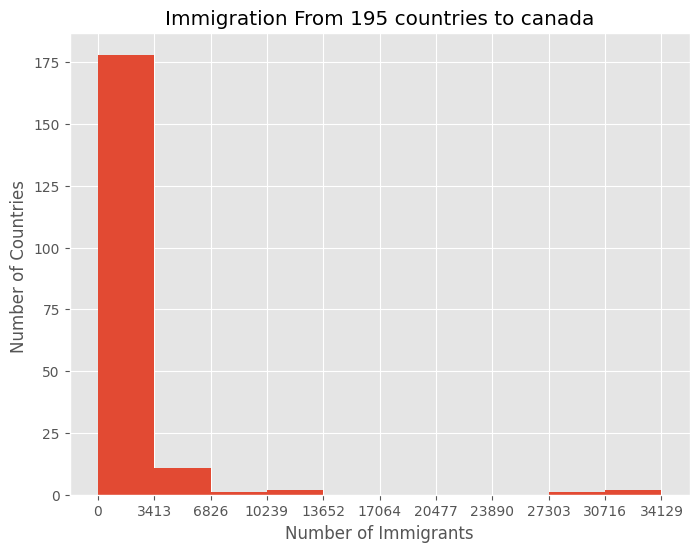

In [223]:
df['2013'].plot(kind='hist', figsize=(8, 6), xticks=bin_edges)

plt.title("Immigration From 195 countries to canada")

plt.xlabel("Number of Immigrants")
plt.ylabel("Number of Countries ")
plt.show()

In [224]:
countries = df.loc[["Denmark", "Norway", "Sweden"], years]
countries

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


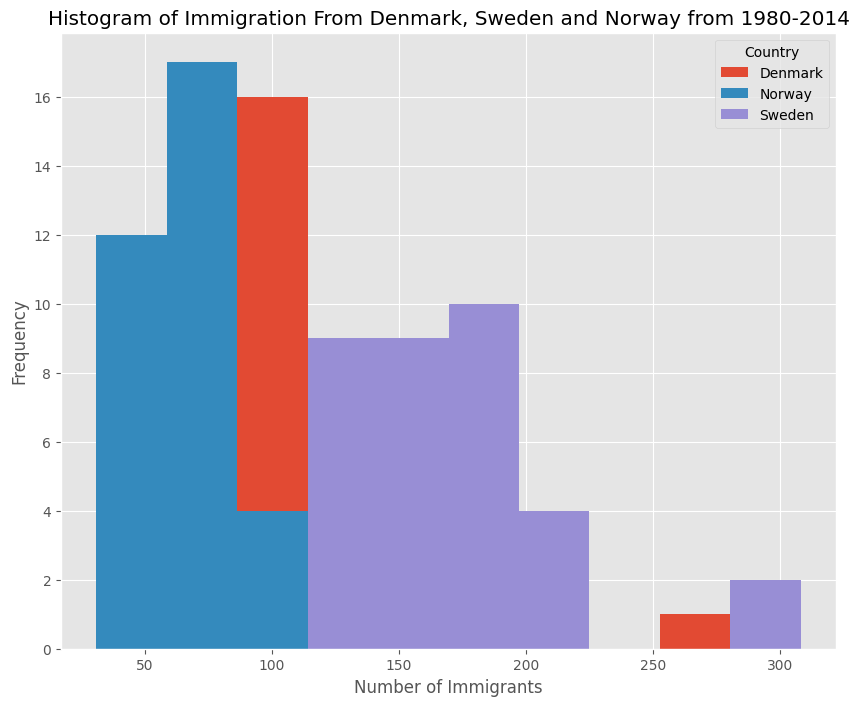

In [225]:
# df.loc[["Denmark", "Norway", "Sweden"], years].transpose()
df_1 = df.loc[["Denmark", "Norway", "Sweden"], years]
df_2 = df_1.transpose()
df_2.plot(kind="hist", figsize=(10, 8))
plt.title("Histogram of Immigration From Denmark, Sweden and Norway from 1980-2014")
plt.xlabel("Number of Immigrants")
plt.ylabel("Frequency")
plt.show()

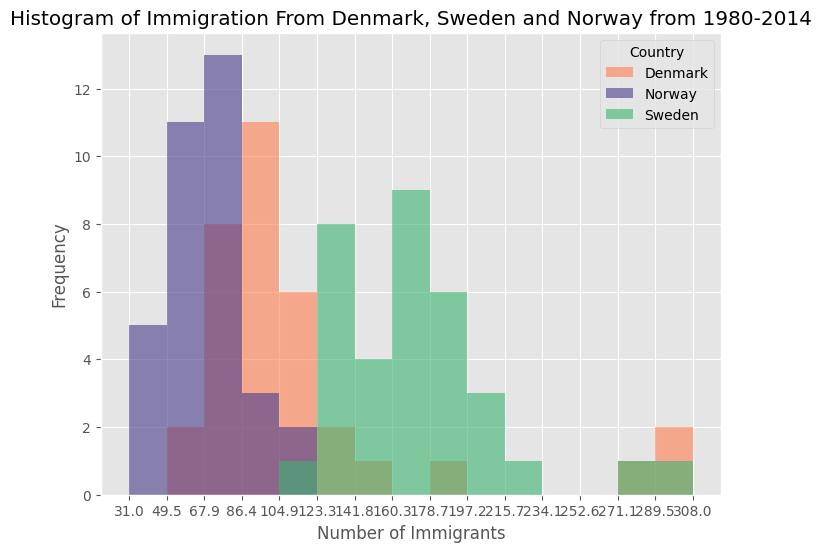

In [226]:
count, bin_edges = np.histogram(df_2, 15)

df_2.plot(kind='hist', figsize=(8, 6), bins=15, alpha=0.6,
          xticks=bin_edges, color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title("Histogram of Immigration From Denmark, Sweden and Norway from 1980-2014")
plt.xlabel("Number of Immigrants")
plt.ylabel("Frequency")
plt.show()

In [227]:
for name, hex in mpl.colors.cnames.items():
    print([name, hex])

color1 = pd.read

['aliceblue', '#F0F8FF']
['antiquewhite', '#FAEBD7']
['aqua', '#00FFFF']
['aquamarine', '#7FFFD4']
['azure', '#F0FFFF']
['beige', '#F5F5DC']
['bisque', '#FFE4C4']
['black', '#000000']
['blanchedalmond', '#FFEBCD']
['blue', '#0000FF']
['blueviolet', '#8A2BE2']
['brown', '#A52A2A']
['burlywood', '#DEB887']
['cadetblue', '#5F9EA0']
['chartreuse', '#7FFF00']
['chocolate', '#D2691E']
['coral', '#FF7F50']
['cornflowerblue', '#6495ED']
['cornsilk', '#FFF8DC']
['crimson', '#DC143C']
['cyan', '#00FFFF']
['darkblue', '#00008B']
['darkcyan', '#008B8B']
['darkgoldenrod', '#B8860B']
['darkgray', '#A9A9A9']
['darkgreen', '#006400']
['darkgrey', '#A9A9A9']
['darkkhaki', '#BDB76B']
['darkmagenta', '#8B008B']
['darkolivegreen', '#556B2F']
['darkorange', '#FF8C00']
['darkorchid', '#9932CC']
['darkred', '#8B0000']
['darksalmon', '#E9967A']
['darkseagreen', '#8FBC8F']
['darkslateblue', '#483D8B']
['darkslategray', '#2F4F4F']
['darkslategrey', '#2F4F4F']
['darkturquoise', '#00CED1']
['darkviolet', '#9400D3

AttributeError: module 'pandas' has no attribute 'read'

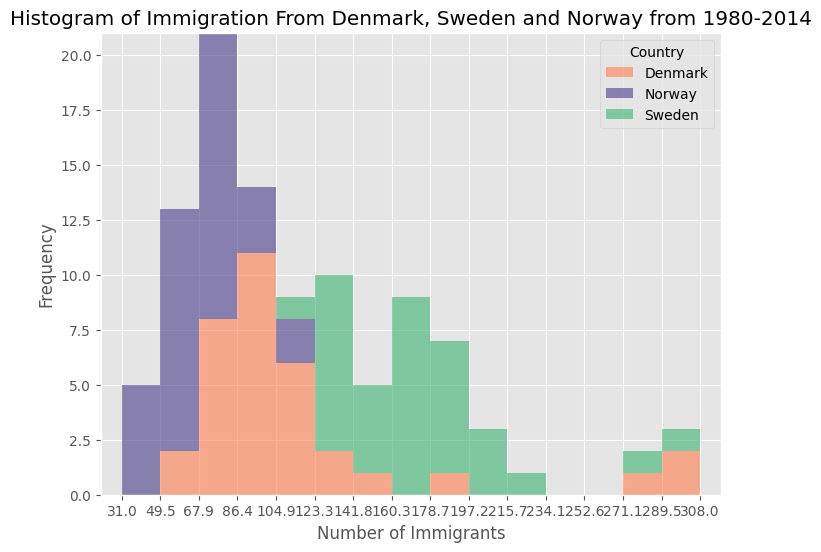

In [ ]:
count, bin_edges = np.histogram(df_2, 15)
xmin = bin_edges[0]-10
xmax = bin_edges[-1]+10
df_2.plot(kind='hist', figsize=(8, 6), bins=15, alpha=0.6,
          xticks=bin_edges, color=['coral', 'darkslateblue', 'mediumseagreen'], stacked=True, xlim=(xmin, xmax))

plt.title("Histogram of Immigration From Denmark, Sweden and Norway from 1980-2014")
plt.xlabel("Number of Immigrants")
plt.ylabel("Frequency")
plt.show()

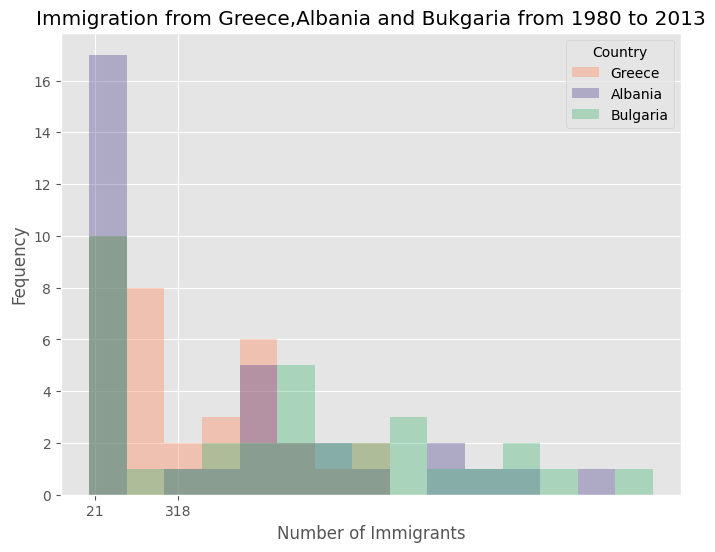

In [ ]:
df_3 = df.loc[["Greece", "Albania", "Bulgaria"], years]
df_3 = df_3.transpose()

count, edges = np.histogram(df_3, 15)
xmin = bin_edges[0]-10
xmax = bin_edges[-1]+10
df_3.plot(kind="hist", figsize=(8, 6), bins=15, alpha=0.35, xticks=(
    xmin, xmax), color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title("Immigration from Greece,Albania and Bukgaria from 1980 to 2013")
plt.xlabel("Number of Immigrants")
plt.ylabel("Fequency")
plt.show()

In [ ]:
df_iceland = df.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

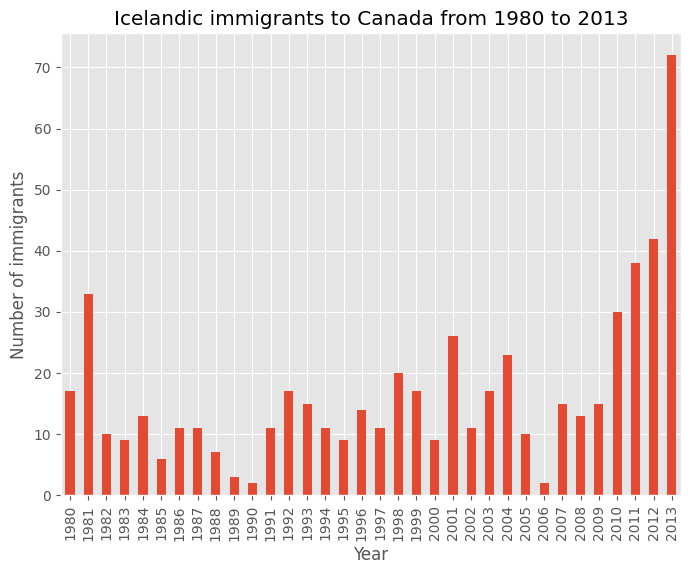

In [ ]:
df_iceland.plot(kind='bar', figsize=(8, 6))

plt.xlabel('Year')  # add to x-label to the plot
plt.ylabel('Number of immigrants')  # add y-label to the plot
# add title to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013')

plt.show()

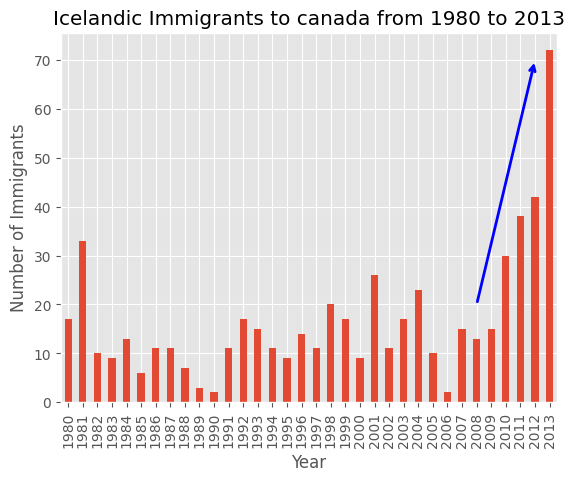

In [ ]:
from matplotlib.patches import ArrowStyle


df_iceland.plot(kind='bar', rot=90)

plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.title("Icelandic Immigrants to canada from 1980 to 2013")
plt.annotate('', xy=(32, 70), xytext=(28, 20), xycoords='data', arrowprops=dict(
    arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.show()

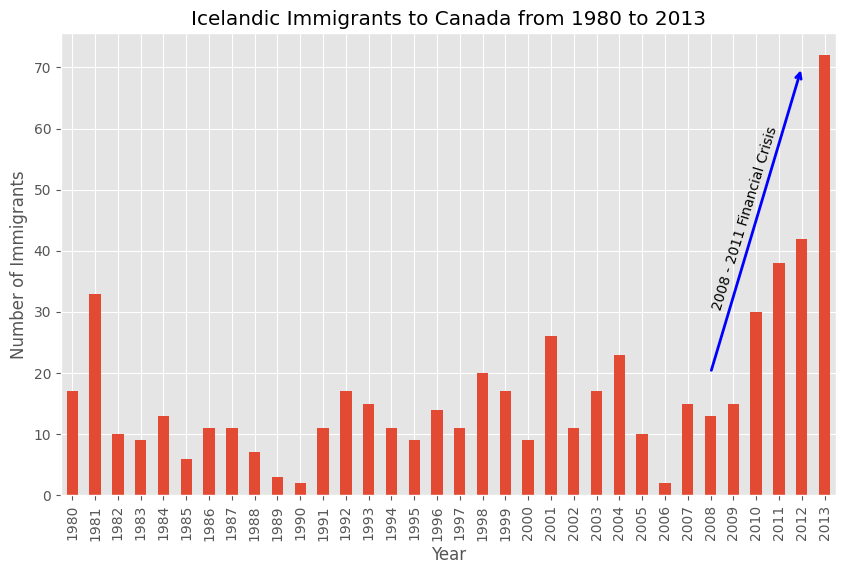

In [ ]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')


plt.annotate('',
             xy=(32, 70),
             xytext=(28, 20),
             xycoords='data',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle='arc3', color='blue', lw=2)
             )

plt.annotate('2008 - 2011 Financial Crisis',
             xy=(28, 30),
             rotation=73,
             va='bottom',
             ha='left',
             )

plt.show()

In [ ]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [ ]:
df = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

In [242]:
df.sort_values(by='Total', ascending=True, inplace=True)

df_top15 = df['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

In [244]:
df_top15 = df_top15.transpose()
df_top15.head(6)

Country
Romania      93585
Viet Nam     97146
Jamaica     106431
France      109091
Lebanon     115359
Poland      139241
Name: Total, dtype: int64

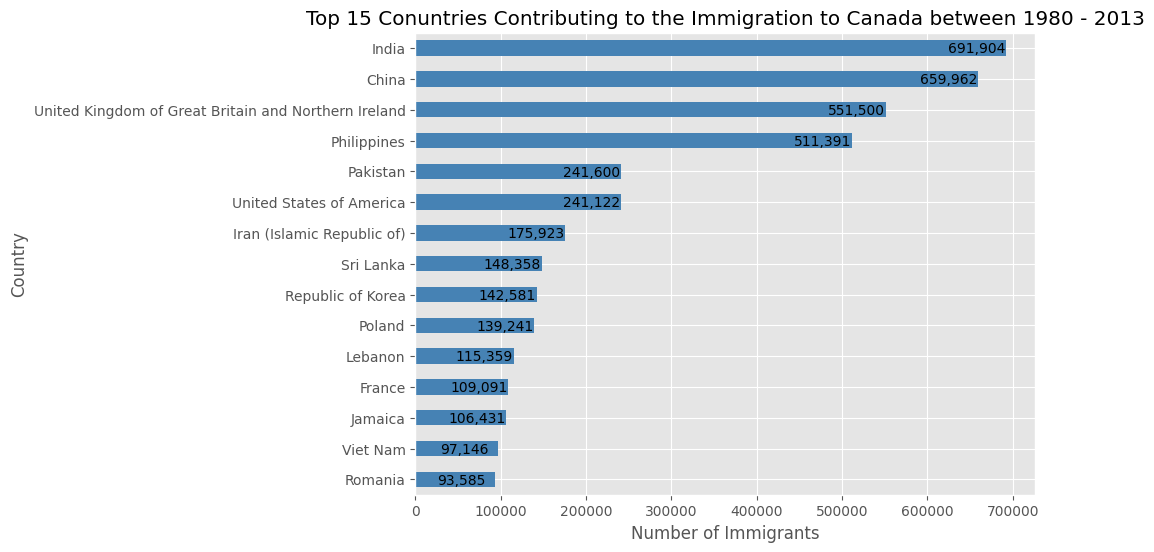

In [268]:
df_top15.plot(kind='barh', figsize=(8, 6), color='steelblue')

plt.xlabel('Number of Immigrants')
plt.title(
    'Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

for index, value in enumerate(df_top15):
    label = format(int(value), ',')

    plt.annotate(label, xy=(value - 68000, index - 0.15), color='black')
plt.show()